In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DATA PREPROCESSING

In [2]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/projects/stock_file/google_stocks/train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# choosing close column as training stocks
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN model

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Save the model
regressor.save('g_stocks_pred.model') 

Epoch 1/100
38/38 [==============================] - 13s 62ms/step - loss: 0.0398
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0041
Epoch 13/100
38/38 [====

INFO:tensorflow:Assets written to: g_stocks_pred.model/assets


INFO:tensorflow:Assets written to: g_stocks_pred.model/assets


## Making the predictions and visualising the results

In [7]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/projects/stock_file/google_stocks/test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [8]:
# comparing predicted value to orginal value
print(np.concatenate((predicted_stock_price,real_stock_price),1)[0:10])

[[783.56427002 778.81      ]
 [780.83782959 788.36      ]
 [780.71929932 786.08      ]
 [781.91217041 795.26      ]
 [785.09020996 806.4       ]
 [790.75109863 807.86      ]
 [796.18017578 805.        ]
 [798.70709229 807.14      ]
 [799.20123291 807.48      ]
 [798.85522461 807.08      ]]


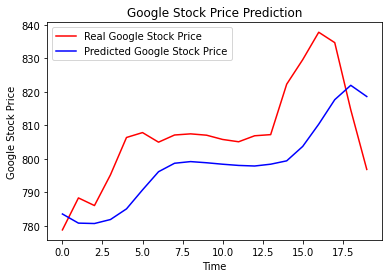

<Figure size 432x288 with 0 Axes>

In [9]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Save the plot to disk
plt.savefig('stocks graph of google stocks.png')